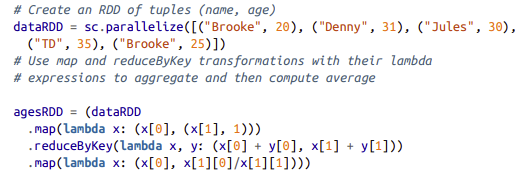

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
# Create a DataFrame using SparkSession
spark = (SparkSession
 .builder
 .appName("AuthorsAges")
 .getOrCreate())
# Create a DataFrame
data_df = spark.createDataFrame([("Brooke", 20), ("Denny", 31), ("Jules", 30), ("TD", 35),
                                 ("Brooke", 25)], ["name", "age"])
# Group the same names together, aggregate their ages, and compute an average
avg_df = data_df.groupBy("name").agg(avg("age"))
# Show the results of the final execution
avg_df.show()

+------+--------+
|  name|avg(age)|
+------+--------+
|Brooke|    22.5|
| Jules|    30.0|
|    TD|    35.0|
| Denny|    31.0|
+------+--------+



## Two ways to define a schema

In [2]:
from pyspark.sql.types import *
schema = StructType([StructField("author", StringType(), False),
 StructField("title", StringType(), False),
 StructField("pages", IntegerType(), False)])

Defining the same schema using DDL is much simpler

In [3]:
schema = "author STRING, title STRING, pages INT"